<h2>Seaborn-kaavioita määrällisille muuttujille</h2>

- <b>distplot</b>: luokiteltu jakauma histogrammina
- <b>boxplot</b>: viiden luvun yhteenveto
- <b>pairplot</b>: hajontakaaviomatriisi
- <b>jointplot</b>: hajontakaavio + luokitellut jakaumat histogrammeina
- <b>heatmap</b>: lukuarvojen tehostaminen väreillä

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-whitegrid')

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<h3>Distplot</h3>

Distplot tekee histogrammin ja estimoi todennäköisyysjakauman, josta data on peräisin.

C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


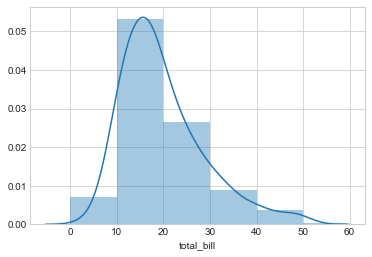

In [3]:
#Poistan puuttuvat arvot dropna()-funktiolla
sns.distplot(a=tips['total_bill'].dropna(), bins=[0,10,20,30,40,50,60])

C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


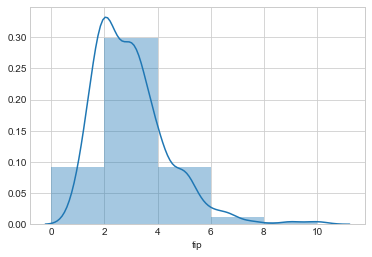

In [4]:
sns.distplot(a=tips['tip'].dropna(), bins=[0,2,4,6,8,10])

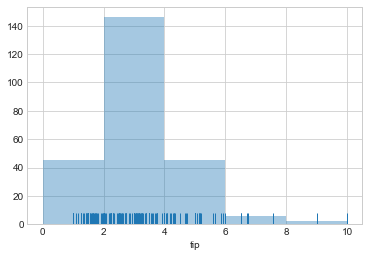

In [5]:
#Jos rug=True, niin näen tarkemmat jakaumat luokkien sisällä
sns.distplot(a=tips['tip'].dropna(), bins=[0,2,4,6,8,10], kde=False, rug=True)

<h3>Boxplot</h3>

Boxplot esittää havainnollisesti viiden luvun yhteenvedon (pienin, alaneljännes, mediaani, yläneljännes, suurin). Muista havainnoista selvästi poikkeavat havainnot esitetään erillisinä pisteinä.

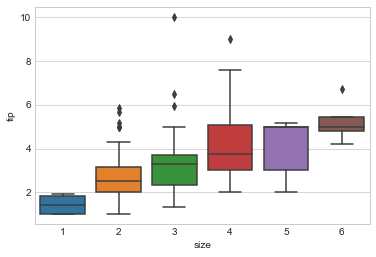

In [6]:
sns.boxplot(x='size', y='tip', data=tips)

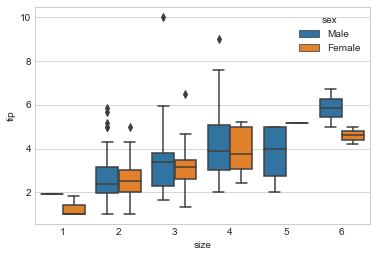

In [7]:
sns.boxplot(x='size', y='tip', hue='sex', data=tips)

<h3>Pairplot</h3>

Pairplot esittää muuttujien väliset riippuvuudet hajontakaaviomatriisina.

In [8]:
opintomenestys = pd.read_excel('http://taanila.fi/opintomenestys.xlsx')
opintomenestys.head()

,koehenkilö,verbaalinen,looginen,kielet,matematiikka,opintomenestys,sukupuoli
0,2,26,32,8.2,7,16,Nainen
1,3,29,33,9.6,5,17,Nainen
2,6,28,36,9.2,7,19,Nainen
3,7,23,34,7.2,7,14,Nainen
4,10,29,34,9.7,8,19,Nainen


C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


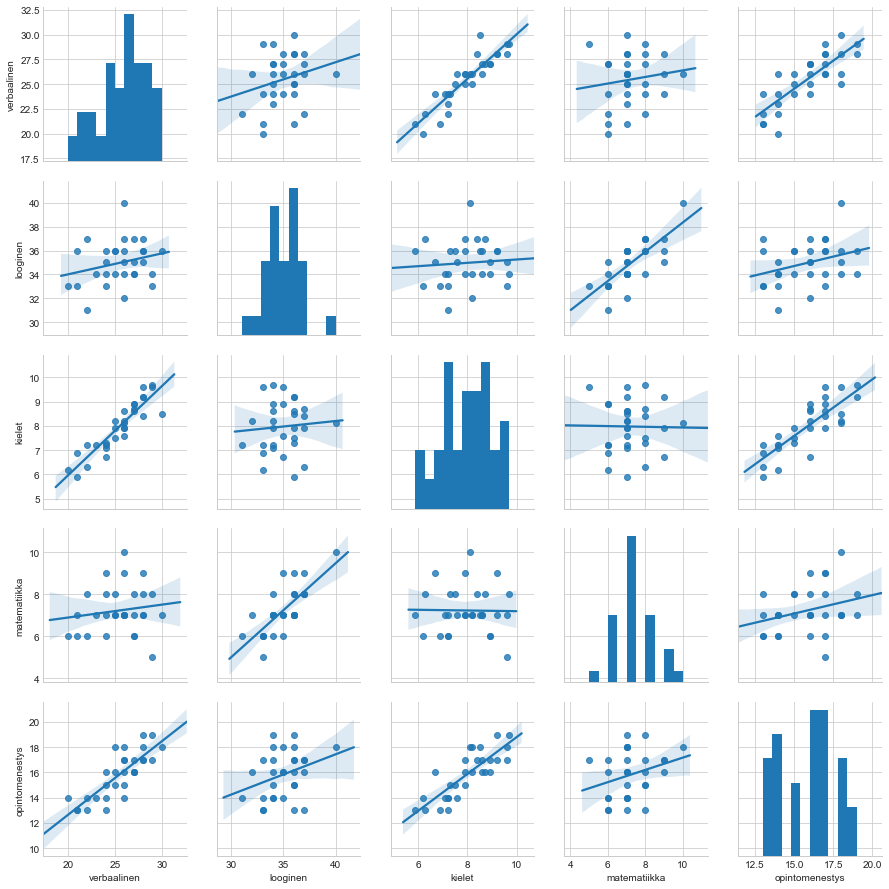

In [9]:
sns.pairplot(opintomenestys.drop('koehenkilö', axis=1), kind='reg')

C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


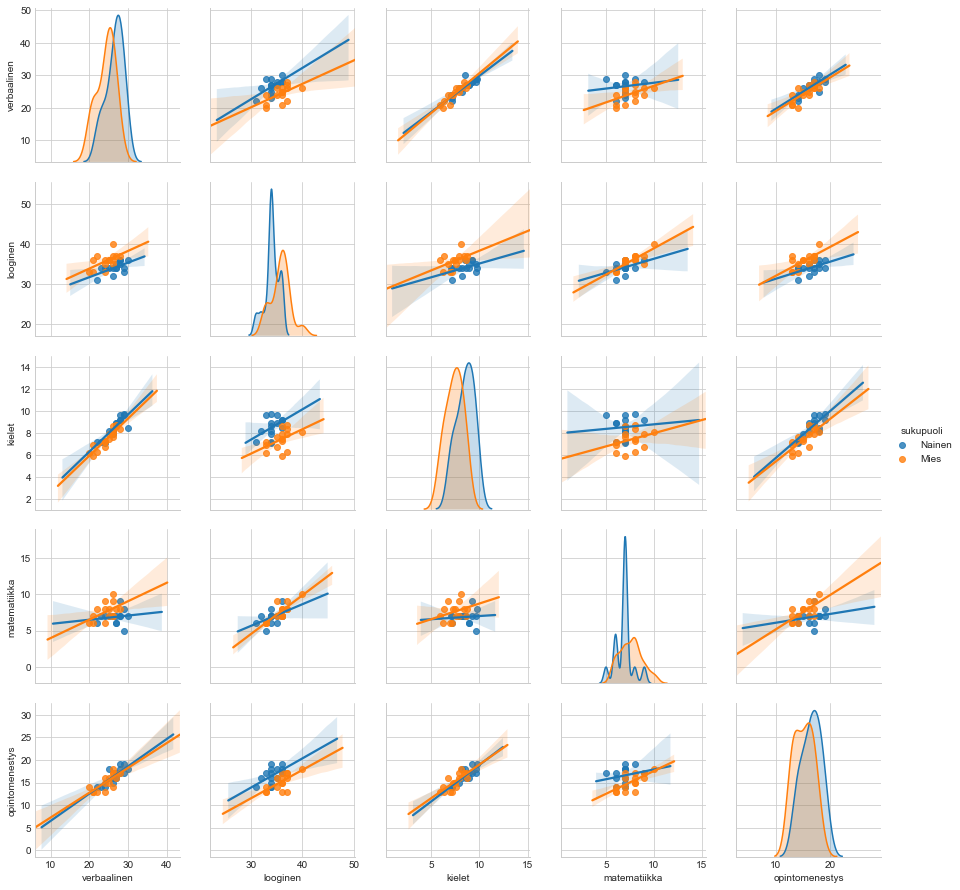

In [10]:
sns.pairplot(opintomenestys.drop('koehenkilö', axis=1), hue='sukupuoli', kind='reg')

<h3>Jointplot</h3>

Jointplot esittää hajontakaavion ja molempien muuttujien jakaumat histogrammeina.

C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


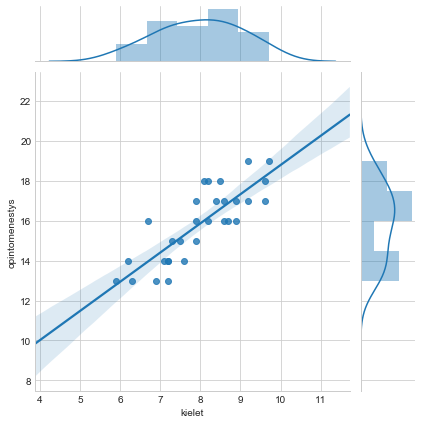

In [11]:
sns.jointplot(x='kielet', y='opintomenestys', data=opintomenestys, kind='reg')

C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


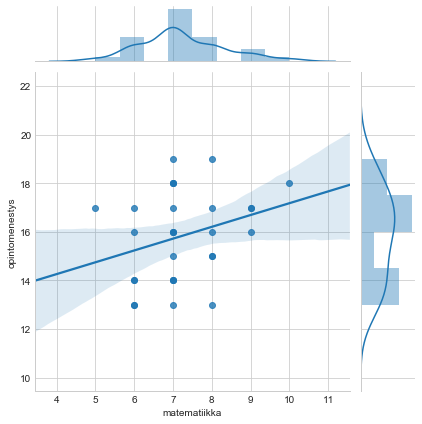

In [12]:
sns.jointplot(x='matematiikka', y='opintomenestys', data=opintomenestys, kind='reg')

<h3>Heatmap</h3>

Heatmap korostaa dataframen lukuja väreillä.

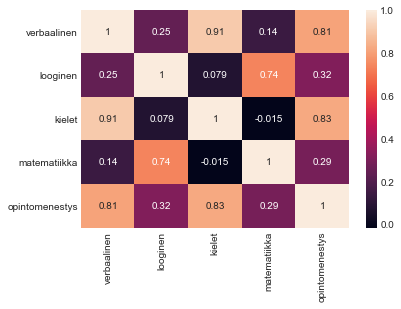

In [13]:
korrelaatiot = opintomenestys.drop('koehenkilö', axis=1).corr()
sns.heatmap(data=korrelaatiot, annot=True)